In [24]:
import json
from KeyProcessor import KeyWebsite
import pandas as pd

KeyWebsite.create_required_dirs()

Required directories present


# Example Usage of the KeyProcessor.py Class

This notebook gives a brief example of how you can incorporate the class into a typical EDA notebook.

In this notebook, I'll be exploring average SAT scores for hispanic students in Waco ISD High Schools for the years 2014-2015 and 2018-2019.

Any analysis made is for illustration purposes only.


## Loading the Dataset Into pandas

While most attributes are floats, pandas loads them in as objects since there are some strings within each row.

Without knowing which columns represent what metric, we can't continue EDA.

In [25]:
CCAD_20_df = pd.read_csv('A://DS4A/DS4A Empowerment/Project/Downloads/Waco ISD/CCAD_19-20.csv')
CCAD_15_df = pd.read_csv('A://DS4A/DS4A Empowerment/Project/Downloads/Waco ISD/CCAD_15-16.csv')

### Exploring the Dataframe

In [27]:
CCAD_20_df.head(20)

,CAMPUS,C20CAA18R,C20CAA19R,C20CAC18R,C20CAC19R,C20CAE18R,C20CAE19R,C20CAM18R,C20CAM19R,C20CC18R,...,CW0CC18R,CW0CC19R,CW0CSA18R,CW0CSA19R,CW0CSE18R,CW0CSE19R,CW0CSM18R,CW0CSM19R,CW0CT18R,CW0CT19R
0,'161914002,13.2,20.0,12.6,20.8,11.9,19.7,15.0,19.6,0.0,...,30.4,51.4,1098,1206,574,604,523,602,88.5,85.4
1,'161914003,18.5,15.8,17.3,17.6,18.5,14.3,19.2,16.6,16.7,...,30.8,19.0,-1,-1,-1,-1,-1,-1,86.7,95.5


In [28]:
CCAD_15_df.head(20)

,CAMPUS,C20CAA14R,C20CAA15R,C20CAC14R,C20CAC15R,C20CAE14R,C20CAE15R,C20CAM14R,C20CAM15R,C20CC14R,...,CW0CC14R,CW0CC15R,CW0CSA14R,CW0CSA15R,CW0CSE14R,CW0CSE15R,CW0CSM14R,CW0CSM15R,CW0CT14R,CW0CT15R
0,'161914002,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,38.9,19,1514,1391,1006,943,508,448,75.0,56.8
1,'161914003,.,-1,.,-1,.,-1,.,-1,.,...,0.0,20,-1,-1,-1,-1,-1,-1,20.8,31.3


## Using the KeyProcessor

First I'll scrape the site and see what the dictionary looks like.

In [29]:
CCAD_2020 = KeyWebsite('https://rptsvr1.tea.texas.gov/perfreport/tapr/2020/xplore/ccad.html')
CCAD_2016 = KeyWebsite('https://rptsvr1.tea.texas.gov/perfreport/tapr/2016/xplore/ccad.html')

print(f'2020: {json.dumps(CCAD_2020.scrape(), indent=3)}')
print(f'2016: {json.dumps(CCAD_2016.scrape(), indent=3)}')


2020: {
   "CB0CAA18R": "Campus 2018 ACT: African American Students, ACT Average",
   "CB0CAE18R": "Campus 2018 ACT: African American Students, ACT ELA Average",
   "CB0CAM18R": "Campus 2018 ACT: African American Students, ACT Math Average",
   "CB0CAC18R": "Campus 2018 ACT: African American Students, ACT Science Average",
   "CA0CAA18R": "Campus 2018 ACT: All Students, ACT Average",
   "CA0CAE18R": "Campus 2018 ACT: All Students, ACT ELA Average",
   "CA0CAM18R": "Campus 2018 ACT: All Students, ACT Math Average",
   "CA0CAC18R": "Campus 2018 ACT: All Students, ACT Science Average",
   "CI0CAA18R": "Campus 2018 ACT: American Indian Students, ACT Average",
   "CI0CAE18R": "Campus 2018 ACT: American Indian Students, ACT ELA Average",
   "CI0CAM18R": "Campus 2018 ACT: American Indian Students, ACT Math Average",
   "CI0CAC18R": "Campus 2018 ACT: American Indian Students, ACT Science Average",
   "C30CAA18R": "Campus 2018 ACT: Asian Students, ACT Average",
   "C30CAE18R": "Campus 2018 ACT:

Next I'll run the defaults cleans on both sets:

In [30]:
print(f'2020: {json.dumps(CCAD_2020.clean(), indent=3)}')
print(f'2015: {json.dumps(CCAD_2016.clean(), indent=3)}')

2020: {
   "CB0CAA18R": "Campus 2018 ACT: African American, ACT Avg",
   "CB0CAE18R": "Campus 2018 ACT: African American, ACT ELA Avg",
   "CB0CAM18R": "Campus 2018 ACT: African American, ACT Math Avg",
   "CB0CAC18R": "Campus 2018 ACT: African American, ACT Science Avg",
   "CA0CAA18R": "Campus 2018 ACT: All, ACT Avg",
   "CA0CAE18R": "Campus 2018 ACT: All, ACT ELA Avg",
   "CA0CAM18R": "Campus 2018 ACT: All, ACT Math Avg",
   "CA0CAC18R": "Campus 2018 ACT: All, ACT Science Avg",
   "CI0CAA18R": "Campus 2018 ACT: American Indian, ACT Avg",
   "CI0CAE18R": "Campus 2018 ACT: American Indian, ACT ELA Avg",
   "CI0CAM18R": "Campus 2018 ACT: American Indian, ACT Math Avg",
   "CI0CAC18R": "Campus 2018 ACT: American Indian, ACT Science Avg",
   "C30CAA18R": "Campus 2018 ACT: Asian, ACT Avg",
   "C30CAE18R": "Campus 2018 ACT: Asian, ACT ELA Avg",
   "C30CAM18R": "Campus 2018 ACT: Asian, ACT Math Avg",
   "C30CAC18R": "Campus 2018 ACT: Asian, ACT Science Avg",
   "CE0CAA18R": "Campus 2018 ACT

Now I'll add my own replacements to shorten the descriptions further:

In [31]:
target_words = {
    'Campus ': ' ',
    '2019': '19',
    '2018': '18',
    '2015': '15',
    '2014': '14'
}

print(f'2020: {json.dumps(CCAD_2020.clean(replacement_dict=target_words, override_default=True), indent=3)}')
print(f'2015: {json.dumps(CCAD_2016.clean(replacement_dict=target_words, override_default=True), indent=3)}')

2020: {
   "CB0CAA18R": "18 ACT: African American Students, ACT Average",
   "CB0CAE18R": "18 ACT: African American Students, ACT ELA Average",
   "CB0CAM18R": "18 ACT: African American Students, ACT Math Average",
   "CB0CAC18R": "18 ACT: African American Students, ACT Science Average",
   "CA0CAA18R": "18 ACT: All Students, ACT Average",
   "CA0CAE18R": "18 ACT: All Students, ACT ELA Average",
   "CA0CAM18R": "18 ACT: All Students, ACT Math Average",
   "CA0CAC18R": "18 ACT: All Students, ACT Science Average",
   "CI0CAA18R": "18 ACT: American Indian Students, ACT Average",
   "CI0CAE18R": "18 ACT: American Indian Students, ACT ELA Average",
   "CI0CAM18R": "18 ACT: American Indian Students, ACT Math Average",
   "CI0CAC18R": "18 ACT: American Indian Students, ACT Science Average",
   "C30CAA18R": "18 ACT: Asian Students, ACT Average",
   "C30CAE18R": "18 ACT: Asian Students, ACT ELA Average",
   "C30CAM18R": "18 ACT: Asian Students, ACT Math Average",
   "C30CAC18R": "18 ACT: Asian 

Now that my dictionaries are in a form I'm comfortable working with, I'll go ahead and use it to remap my dataset.

In [32]:
CCAD_2020.dataset_path = 'A://DS4A/DS4A Empowerment/Project/Downloads/Waco ISD/CCAD_19-20.csv'
CCAD_2016.dataset_path = 'A://DS4A/DS4A Empowerment/Project/Downloads/Waco ISD/CCAD_15-16.csv'

CCAD_2020.remap()
CCAD_2016.remap()

CSV file stored at: ./Processed_Datasets/CCAD_19-20_cleaned_mappings.csv
CSV file stored at: ./Processed_Datasets/CCAD_15-16_cleaned_mappings.csv


Reloading the remapped datasets:

In [33]:
CCAD_20_cleaned_df = pd.read_csv('./Processed_Datasets/CCAD_19-20_cleaned_mappings.csv')
CCAD_15_cleaned_df = pd.read_csv('./Processed_Datasets/CCAD_15-16_cleaned_mappings.csv')

CCAD_20_cleaned_df.head(2)

,CAMPUS,"18 ACT: Two or More Races Students, ACT Average","19 ACT: Two or More Races Students, ACT Average","18 ACT: Two or More Races Students, ACT Science Average","19 ACT: Two or More Races Students, ACT Science Average","18 ACT: Two or More Races Students, ACT ELA Average","19 ACT: Two or More Races Students, ACT ELA Average","18 ACT: Two or More Races Students, ACT Math Average","19 ACT: Two or More Races Students, ACT Math Average","18 SAT/ACT: Two or More Races Students, % Above Criterion",...,"18 SAT/ACT: White Students, % Above Criterion","19 SAT/ACT: White Students, % Above Criterion","18 SAT: White Students, SAT Average","19 SAT: White Students, SAT Average","18 SAT: White Students, SAT ELA Average","19 SAT: White Students, SAT ELA Average","18 SAT: White Students, SAT Math Average","19 SAT: White Students, SAT Math Average","18 SAT/ACT: White Students, % Test-Taking","19 SAT/ACT: White Students, % Test-Taking"
0,'161914002,13.2,20.0,12.6,20.8,11.9,19.7,15.0,19.6,0.0,...,30.4,51.4,1098,1206,574,604,523,602,88.5,85.4
1,'161914003,18.5,15.8,17.3,17.6,18.5,14.3,19.2,16.6,16.7,...,30.8,19.0,-1,-1,-1,-1,-1,-1,86.7,95.5


In [34]:
CCAD_15_cleaned_df.head(2)

,CAMPUS,"14 ACT: Two or more races Students, ACT Average","15 ACT: Two or more races Students, ACT Average","14 ACT: Two or more races Students, ACT Science Average","15 ACT: Two or more races Students, ACT Science Average","14 ACT: Two or more races Students, ACT ELA Average","15 ACT: Two or more races Students, ACT ELA Average","14 ACT: Two or more races Students, ACT Math Average","15 ACT: Two or more races Students, ACT Math Average","14 SAT/ACT: Two or more races Students, % Above Criterion",...,"14 SAT/ACT: White Students, % Above Criterion","15 SAT/ACT: White Students, % Above Criterion","14 SAT: White Students, SAT Average","15 SAT: White Students, SAT Average","14 SAT: White Students, SAT ELA Average","15 SAT: White Students, SAT ELA Average","14 SAT: White Students, SAT Math Average","15 SAT: White Students, SAT Math Average","14 SAT/ACT: White Students, % Test-Taking","15 SAT/ACT: White Students, % Test-Taking"
0,'161914002,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,38.9,19,1514,1391,1006,943,508,448,75.0,56.8
1,'161914003,.,-1,.,-1,.,-1,.,-1,.,...,0.0,20,-1,-1,-1,-1,-1,-1,20.8,31.3


Extracting Hispanic student average SAT scores in our datasets:

In [35]:

CCAD_20_hispanic_df = CCAD_20_cleaned_df.set_index('CAMPUS').filter(axis=1, like='Hispanic')
CCAD_15_hispanic_df = CCAD_15_cleaned_df.set_index('CAMPUS').filter(axis=1, like='Hispanic')

In [36]:
CCAD_20_hispanic_df.head(2)

,"18 ACT: Hispanic Students, ACT Average","19 ACT: Hispanic Students, ACT Average","18 ACT: Hispanic Students, ACT Science Average","19 ACT: Hispanic Students, ACT Science Average","18 ACT: Hispanic Students, ACT ELA Average","19 ACT: Hispanic Students, ACT ELA Average","18 ACT: Hispanic Students, ACT Math Average","19 ACT: Hispanic Students, ACT Math Average","18 SAT/ACT: Hispanic Students, % Above Criterion","19 SAT/ACT: Hispanic Students, % Above Criterion","18 SAT: Hispanic Students, SAT Average","19 SAT: Hispanic Students, SAT Average","18 SAT: Hispanic Students, SAT ELA Average","19 SAT: Hispanic Students, SAT ELA Average","18 SAT: Hispanic Students, SAT Math Average","19 SAT: Hispanic Students, SAT Math Average","18 SAT/ACT: Hispanic Students, % Test-Taking","19 SAT/ACT: Hispanic Students, % Test-Taking"
CAMPUS,,,,,,,,,,,,,,,,,,
'161914002,15.5,15.2,16.2,16.1,14.6,14.2,15.9,15.8,11.0,8.1,1028,947,532,479,496,468,88.0,88.3
'161914003,15.2,16.2,15.6,17.1,14.3,15.2,16.0,16.8,7.4,10.8,996,1021,509,511,488,510,92.5,86.6


In [37]:
CCAD_15_hispanic_df.head(2)

,"14 ACT: Hispanic Students, ACT Average","15 ACT: Hispanic Students, ACT Average","14 ACT: Hispanic Students, ACT Science Average","15 ACT: Hispanic Students, ACT Science Average","14 ACT: Hispanic Students, ACT ELA Average","15 ACT: Hispanic Students, ACT ELA Average","14 ACT: Hispanic Students, ACT Math Average","15 ACT: Hispanic Students, ACT Math Average","14 SAT/ACT: Hispanic Students, % Above Criterion","15 SAT/ACT: Hispanic Students, % Above Criterion","14 SAT: Hispanic Students, SAT Average","15 SAT: Hispanic Students, SAT Average","14 SAT: Hispanic Students, SAT ELA Average","15 SAT: Hispanic Students, SAT ELA Average","14 SAT: Hispanic Students, SAT Math Average","15 SAT: Hispanic Students, SAT Math Average","14 SAT/ACT: Hispanic Students, % Test-Taking","15 SAT/ACT: Hispanic Students, % Test-Taking"
CAMPUS,,,,,,,,,,,,,,,,,,
'161914002,16.8,18.0,17.5,18.6,15.7,17.5,17.5,18.2,5.2,11.7,1331,1228,877,806,454,422,45.0,43.2
'161914003,18.1,19.1,18.7,19.2,17.3,18.3,18.7,20.2,1.4,7.1,1276,1255,845,818,431,437,32.3,32.7


In [38]:
CCAD_hispanic_avg_20 = CCAD_20_hispanic_df.filter(axis=1, like='SAT Average')
CCAD_hispanic_avg_15 = CCAD_15_hispanic_df.filter(axis=1, like='SAT Average')

In [39]:
CCAD_hispanic_avg_15.head(2)

,"14 SAT: Hispanic Students, SAT Average","15 SAT: Hispanic Students, SAT Average"
CAMPUS,,
'161914002,1331,1228
'161914003,1276,1255


In [40]:
CCAD_hispanic_avg_20.head(2)

,"18 SAT: Hispanic Students, SAT Average","19 SAT: Hispanic Students, SAT Average"
CAMPUS,,
'161914002,1028,947
'161914003,996,1021


In [43]:
sat_averages = CCAD_hispanic_avg_15.join(CCAD_hispanic_avg_20, on='CAMPUS')

sat_averages.head(5)

,"14 SAT: Hispanic Students, SAT Average","15 SAT: Hispanic Students, SAT Average","18 SAT: Hispanic Students, SAT Average","19 SAT: Hispanic Students, SAT Average"
CAMPUS,,,,
'161914002,1331,1228,1028,947
'161914003,1276,1255,996,1021


<AxesSubplot:xlabel='CAMPUS'>

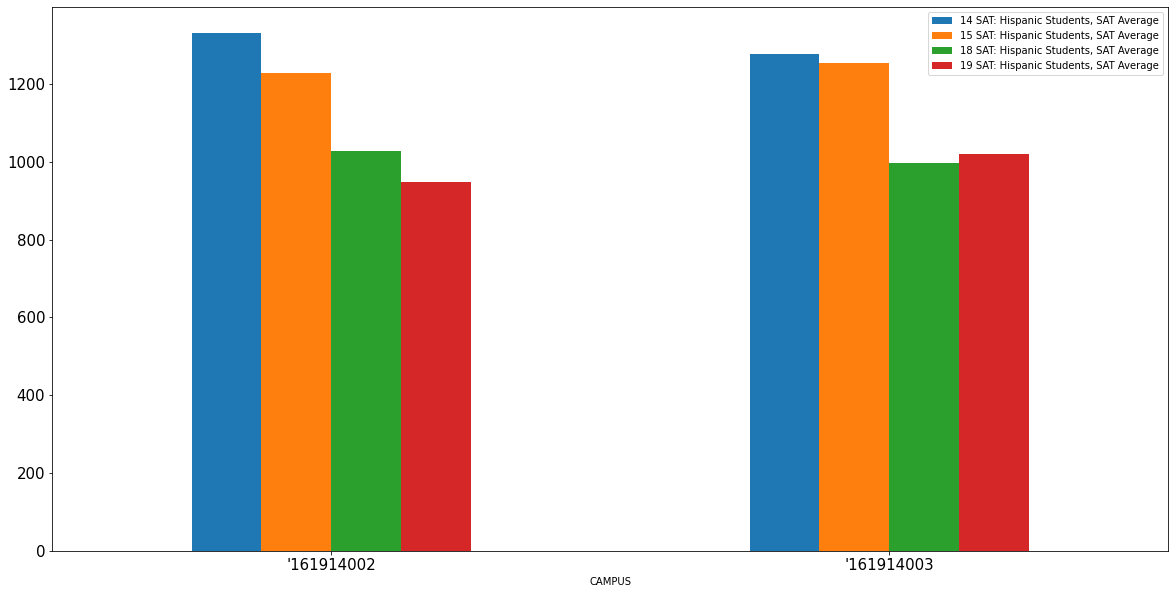

In [50]:
sat_averages.plot.bar(rot=0, figsize=(20, 10), fontsize=15)


That concludes this breif demo of the `KeyProcessor.py` and how it can be incorporated into a data analysis notebook.